In [ ]:
# Загружаем библиотеки
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import LabelEncoder

#pip install lifelines
import lifelines

import warnings
warnings.filterwarnings("ignore")

## <font color = green> Задание №1 </font>

Постройте кривую выживаемости на основании данных.

In [2]:
#генерируем данные
N = 130 #количество телефонов

np.random.seed(0)
task_1 = pd.DataFrame({'Month': np.arange(0, 12, 1), 'Breakdowns (start t)': np.random.randint(1, 20, 12)})
task_1 = task_1.set_index('Month')
task_1['Breakdowns (start t)'][0] = 0 #в момент начала эксперимента поломок нет

task_1

,Breakdowns (start t)
Month,
0,0
1,16
2,1
3,4
4,4
5,8
6,10
7,19
8,5


In [3]:
print('Всего поломок:', task_1['Breakdowns (start t)'].sum())

Всего поломок: 89


In [4]:
#найдем количество несломанных телефонов в каждый месяц- Unbroken (t)
#найдем пропорцию несломанных телефонов к моменту t - proprtion
#найдем вероятность того, что телефон не сломается до момента t - probability


#создаем дополнительные столбцы
task_1['Unbroken (t)'] = 0
task_1['Unbroken (t)'][0] = N

task_1['proportion'] = 0
task_1['proportion'][0] = (N - task_1['Breakdowns (start t)'][0])/N

task_1['probability'] = 0
task_1['probability'][0] = task_1['proportion'][0]


for i in range(1, len(task_1)):
    task_1.loc[i, 'Unbroken (t)'] = task_1.loc[i-1, 'Unbroken (t)'] - task_1.loc[i-1, 'Breakdowns (start t)']
    task_1.loc[i, 'proportion'] = (task_1.loc[i,'Unbroken (t)'] - task_1.loc[i,'Breakdowns (start t)'])/task_1.loc[i,'Unbroken (t)']
    task_1.loc[i, 'probability'] = task_1.loc[i, 'proportion'] * task_1.loc[i-1, 'probability']

task_1

,Breakdowns (start t),Unbroken (t),proportion,probability
Month,,,,
0,0,130,1.000000,1.000000
1,16,130,0.876923,0.876923
2,1,114,0.991228,0.869231
3,4,113,0.964602,0.838462
4,4,109,0.963303,0.807692
5,8,105,0.923810,0.746154
6,10,97,0.896907,0.669231
7,19,87,0.781609,0.523077
8,5,68,0.926471,0.484615


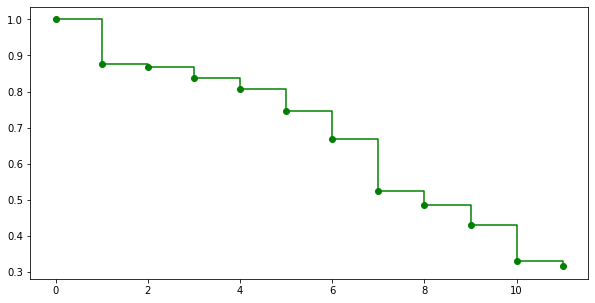

In [5]:
#построим кривую выживаемости (зависимость вероятности,что телефон не сломается, от времени)
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot()
 
ax.step(task_1.index, task_1['probability'], '-go', where='post')
 
plt.show()

## <font color = green> Задание №2 </font>

Сравним рассмотренные расчеты с методом из библиотеки lifelines.

In [6]:
#генерируем данные
N = 8 #количество телефонов

np.random.seed(0)
task_2 = pd.DataFrame({'Month': np.arange(0, 5, 1), 'Breakdowns (start t)': np.random.randint(1, 3, 5)})
task_2 = task_2.set_index('Month')
task_2['Breakdowns (start t)'][0] = 0 #в момент начала эксперимента поломок нет

task_2

,Breakdowns (start t)
Month,
0,0
1,2
2,2
3,1
4,2


In [7]:
print('Всего поломок:', task_2['Breakdowns (start t)'].sum())

Всего поломок: 7


In [8]:
#создаем дополнительные столбцы
task_2['Unbroken (t)'] = 0
task_2['Unbroken (t)'][0] = N

task_2['proportion'] = 0
task_2['proportion'][0] = (N - task_2['Breakdowns (start t)'][0])/N

task_2['probability'] = 0
task_2['probability'][0] = task_2['proportion'][0]


for i in range(1, len(task_2)):
    task_2.loc[i, 'Unbroken (t)'] = task_2.loc[i-1, 'Unbroken (t)'] - task_2.loc[i-1, 'Breakdowns (start t)']
    task_2.loc[i, 'proportion'] = (task_2.loc[i,'Unbroken (t)'] - task_2.loc[i,'Breakdowns (start t)'])/task_2.loc[i,'Unbroken (t)']
    task_2.loc[i, 'probability'] = task_2.loc[i, 'proportion'] * task_2.loc[i-1, 'probability']

task_2

,Breakdowns (start t),Unbroken (t),proportion,probability
Month,,,,
0,0,8,1.000000,1.000
1,2,8,0.750000,0.750
2,2,6,0.666667,0.500
3,1,4,0.750000,0.375
4,2,3,0.333333,0.125


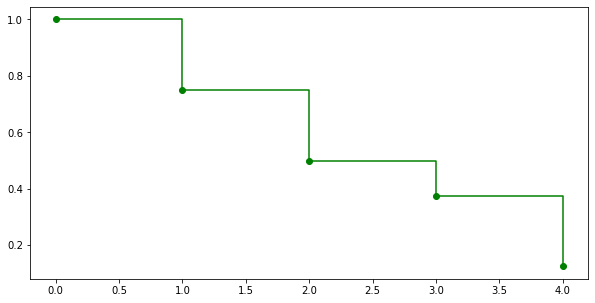

In [9]:
#построим кривую выживаемости (зависимость вероятности,что телефон не сломается, от времени)
fig = plt.figure(figsize=(10, 5))
ax2 = fig.add_subplot()
 
ax2.step(task_2.index, task_2['probability'], '-go', where='post')
 
plt.show()

In [10]:
ID_obj = [1,2,3,4,5,6,7,8]
Month_ = [1,1,2,2,3,4,4,4]
Events = [1,1,1,1,1,1,1,0]
task_21 = pd.DataFrame({'ID': ID_obj, 'Month':Month_, 'Breakdowns (start t)': Events})
task_21

,ID,Month,Breakdowns (start t)
0,1,1,1
1,2,1,1
2,3,2,1
3,4,2,1
4,5,3,1
5,6,4,1
6,7,4,1
7,8,4,0


          KM_estimate
timeline             
0.0             1.000
1.0             0.750
2.0             0.500
3.0             0.375
4.0             0.125


<AxesSubplot:xlabel='timeline'>

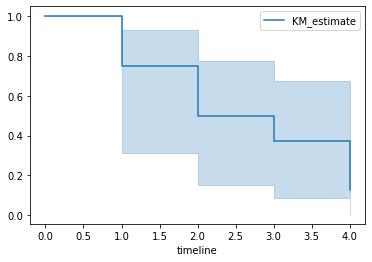

In [11]:
from lifelines import KaplanMeierFitter

kmf = KaplanMeierFitter()
kmf.fit(task_21['Month'], event_observed=task_21['Breakdowns (start t)'])

print(kmf.survival_function_)

kmf.plot()

## <font color = green> Задание №3 </font>

Существует ли значительная разница в продолжительности выживания между двумя группами? Сделайте вывод с помощью Log-Rank теста.

In [12]:
#Проанализируем, отличается ли продолжительность карьеры в хоккее у нападающих и защитников

np.random.seed(0)
position = np.random.choice(['Защитник', 'Нападающий'], size=500, p=[0.5, 0.5])
id_player = np.arange(1,501,1)
career_length = np.random.choice(20,500)
events = np.random.choice([0, 1], size=500)

task_3 = pd.DataFrame({'id_player': id_player, 'position': position, 'career_length': career_length, 'events': events})
task_3.head(5)

,id_player,position,career_length,events
0,1,Нападающий,7,0
1,2,Нападающий,10,1
2,3,Нападающий,18,1
3,4,Нападающий,3,1
4,5,Защитник,12,1


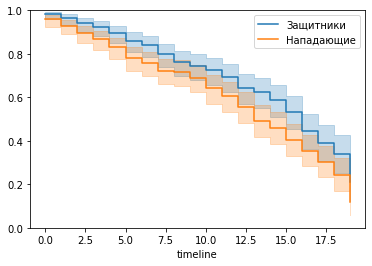

In [13]:
#посмотрим на кривую выживаемости (длительности карьеры)
ax3 = plt.subplot()

kmf.fit(task_3.career_length[task_3.position == 'Защитник'], event_observed=task_3.events[task_3.position == 'Защитник'], 
        label="Защитники")
kmf.plot(ax=ax3, ci_force_lines=False)

kmf.fit(task_3.career_length[task_3.position == 'Нападающий'], event_observed=task_3.events[task_3.position == 'Нападающий'], 
        label="Нападающие")
kmf.plot(ax=ax3, ci_force_lines=False)

plt.ylim(0,1);

In [14]:
#проверим гипотезу с помощью log-rank теста
from lifelines.statistics import logrank_test

criterion = (task_3['position'] == "Нападающий")
CL = task_3.career_length
E = task_3.events

LR_results = logrank_test(CL[criterion], CL[~criterion], E[criterion], E[~criterion])
LR_results.p_value

0.012034942230615795

## <font color = green> Задание №4 </font>

Применение регрессии Кокса.

In [15]:
#воспользуемся данными из задания 3
task_4 = task_3
#добавим наименования лиг
league = np.random.choice(['KHL', 'NHL', 'AHL'], size=500)
task_4['league'] = league
task_4

,id_player,position,career_length,events,league
0,1,Нападающий,7,0,AHL
1,2,Нападающий,10,1,KHL
2,3,Нападающий,18,1,NHL
3,4,Нападающий,3,1,AHL
4,5,Защитник,12,1,AHL
...,...,...,...,...,...
495,496,Защитник,4,1,AHL
496,497,Защитник,10,0,KHL
497,498,Защитник,10,0,AHL
498,499,Защитник,0,1,AHL


In [16]:
#создадим дамми-переменные
task4_dummy = pd.get_dummies(task_4, drop_first=True)
task4_dummy

,id_player,career_length,events,position_Нападающий,league_KHL,league_NHL
0,1,7,0,1,0,0
1,2,10,1,1,1,0
2,3,18,1,1,0,1
3,4,3,1,1,0,0
4,5,12,1,0,0,0
...,...,...,...,...,...,...
495,496,4,1,0,0,0
496,497,10,0,0,1,0
497,498,10,0,0,0,0
498,499,0,1,0,0,0


In [1]:
from lifelines import CoxPHFitter

cph = CoxPHFitter().fit(task4_dummy, 'career_length', 'events')
cph.print_summary()
cph.plot()

ModuleNotFoundError: No module named 'lifelines'

## <font color = green> Задание №5 </font>

Замещение данных.

In [18]:
# Импортируем файл с данными
task_5 = pd.read_excel('file_6.xlsx')

print('Всего наблюдений:', len(task_5))
task_5.head(3)

Всего наблюдений: 300


,ID,Пол,Город,Объем продаж,Неделя
0,1,Женский,Казань,4000.0,3
1,2,Женский,Москва,NaN,3
2,3,Женский,Казань,3000.0,3


In [19]:
#проверка
task_5.loc[1]

ID                    2
Пол             Женский
Город            Москва
Объем продаж        NaN
Неделя                3
Name: 1, dtype: object

In [20]:
#преобразуем категориальные переменные в дамми
le = LabelEncoder()
task_5[['Пол', 'Город']] = pd.DataFrame({'Пол': le.fit_transform(task_5['Пол']), 'Город': le.fit_transform(task_5['Город'])})

task_5.head(5)

,ID,Пол,Город,Объем продаж,Неделя
0,1,0,0,4000.0,3
1,2,0,1,NaN,3
2,3,0,0,3000.0,3
3,4,0,2,4000.0,3
4,5,0,1,3000.0,3


In [21]:
#перед обучением необходимо удалить пропущенные значения
y = task_5.dropna()['Объем продаж'].values # зависимая переменная
ID = task_5.dropna()['ID'].values # идентификатор наблюдения, группирующая переменная
X = task_5.dropna()[['Пол', 'Город', 'Неделя']].values # независимые переменные

In [22]:
#создаем и обучаем GLMM-модель
model = sm.MixedLM(y, X, groups=ID)
result_GLMM = model.fit()


In [23]:
#заменяем пропущенные значения
new_data = task_5.copy()
df5 = pd.DataFrame({'Replaced':
    result_GLMM.predict(new_data.loc[new_data['Объем продаж'].isnull(), ['Пол', 'Город', 'Неделя']]).round()})
df5.head()


df_to_replace = task_5.loc[task_5.index.isin(df5.index)]

#соединяем и оставляем только № субъекта, временную точку и замещённое значение
final = df_to_replace.merge(df5, left_index=True, right_index=True)[['ID', 'Неделя', 'Replaced']]

final

,ID,Неделя,Replaced
1,2,3,3604.0
11,12,3,3625.0
17,18,3,3604.0
22,23,3,3582.0
28,29,3,3625.0
31,32,3,3604.0
44,45,3,3625.0
54,55,3,3532.0
66,67,3,3604.0
69,70,3,3532.0
